In [1]:
# importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data 
df1 = pd.read_csv('GTD.csv' , encoding = 'latin1')

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_1692\2118319152.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('GTD.csv' , encoding = 'latin1')


In [3]:
# head of the given dataset 
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
# after checking the data set we taking the worth columns from given data set 
# and rename them in readable and meanigfull Name .
df1.rename(columns= {'eventid':'Attack_id','iyear':'Year', 'imonth':'Month', 'iday':'Day','country_txt':'Country' ,'region_txt':'region_name','provstate':'State','attacktype1_txt':'attacktype','targtype1_txt':'Target_type','gname':'Group_Name','motive':'Motive','nkill':'kills','nwound':'Wounded','propcomment':'damage_&_loss'},inplace= True)

In [6]:
# createing the dataset as we fillterd 
df1 = df1 [['Attack_id','Year', 'Month', 'Day', 'Country','State','region','region_name','longitude','latitude' ,'attacktype', 'Target_type', 'Group_Name', 'Motive','summary','Wounded', 'kills', 'damage_&_loss']]

In [7]:
df1.shape


(181691, 18)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Attack_id      181691 non-null  int64  
 1   Year           181691 non-null  int64  
 2   Month          181691 non-null  int64  
 3   Day            181691 non-null  int64  
 4   Country        181691 non-null  object 
 5   State          181270 non-null  object 
 6   region         181691 non-null  int64  
 7   region_name    181691 non-null  object 
 8   longitude      177134 non-null  float64
 9   latitude       177135 non-null  float64
 10  attacktype     181691 non-null  object 
 11  Target_type    181691 non-null  object 
 12  Group_Name     181691 non-null  object 
 13  Motive         50561 non-null   object 
 14  summary        115562 non-null  object 
 15  Wounded        165380 non-null  float64
 16  kills          171378 non-null  float64
 17  damage_&_loss  57959 non-null

In [9]:
# decribe the all numrical values in dataframe 
df1.describe()


,Attack_id,Year,Month,Day,region,longitude,latitude,Wounded,kills
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,1.771340e+05,177135.000000,165380.000000,171378.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,7.160938,-4.586957e+02,23.498343,3.167668,2.403272
std,1.325957e+09,13.259430,3.388303,8.814045,2.933408,2.047790e+05,18.569242,35.949392,11.545741
min,1.970000e+11,1970.000000,0.000000,0.000000,1.000000,-8.618590e+07,-53.154613,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,5.000000,4.545640e+00,11.510046,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,6.000000,4.324651e+01,31.467463,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,10.000000,6.871033e+01,34.685087,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,12.000000,1.793667e+02,74.633553,8191.000000,1570.000000


In [10]:
# converting all the null values to meadian 
df1['kills'] = df1['kills'].fillna(df1['kills'].median())

In [11]:
#also wounded 
df1['Wounded']= df1['Wounded'].fillna(df1['Wounded'].median())


In [12]:
#changing that float data types into int 

df1['kills'] = df1['kills'].astype(int)
df1['Wounded'] = df1['Wounded'].astype(int)

In [13]:
# create new column
df1["Casualty"] = df1['kills']+df1['Wounded']

In [14]:
df1.isnull().sum()

Attack_id             0
Year                  0
Month                 0
Day                   0
Country               0
State               421
region                0
region_name           0
longitude          4557
latitude           4556
attacktype            0
Target_type           0
Group_Name            0
Motive           131130
summary           66129
Wounded               0
kills                 0
damage_&_loss    123732
Casualty              0
dtype: int64

In [15]:
# hear we see the Motive summary and Damage& loss has the lot of null values 
# droping maximum null values columns from data frame 
df1.drop(columns = ['Motive','summary','damage_&_loss'],inplace = True)

In [16]:
df1.head(5)

,Attack_id,Year,Month,Day,Country,State,region,region_name,longitude,latitude,attacktype,Target_type,Group_Name,Wounded,kills,Casualty
0,197000000001,1970,7,2,Dominican Republic,NaN,2,Central America & Caribbean,-69.951164,18.456792,Assassination,Private Citizens & Property,MANO-D,0,1,1
1,197000000002,1970,0,0,Mexico,Federal,1,North America,-99.086624,19.371887,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0,0,0
2,197001000001,1970,1,0,Philippines,Tarlac,5,Southeast Asia,120.599741,15.478598,Assassination,Journalists & Media,Unknown,0,1,1
3,197001000002,1970,1,0,Greece,Attica,8,Western Europe,23.762728,37.997490,Bombing/Explosion,Government (Diplomatic),Unknown,0,0,0
4,197001000003,1970,1,0,Japan,Fukouka,4,East Asia,130.396361,33.580412,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,0,0,0


#  Code for visualization

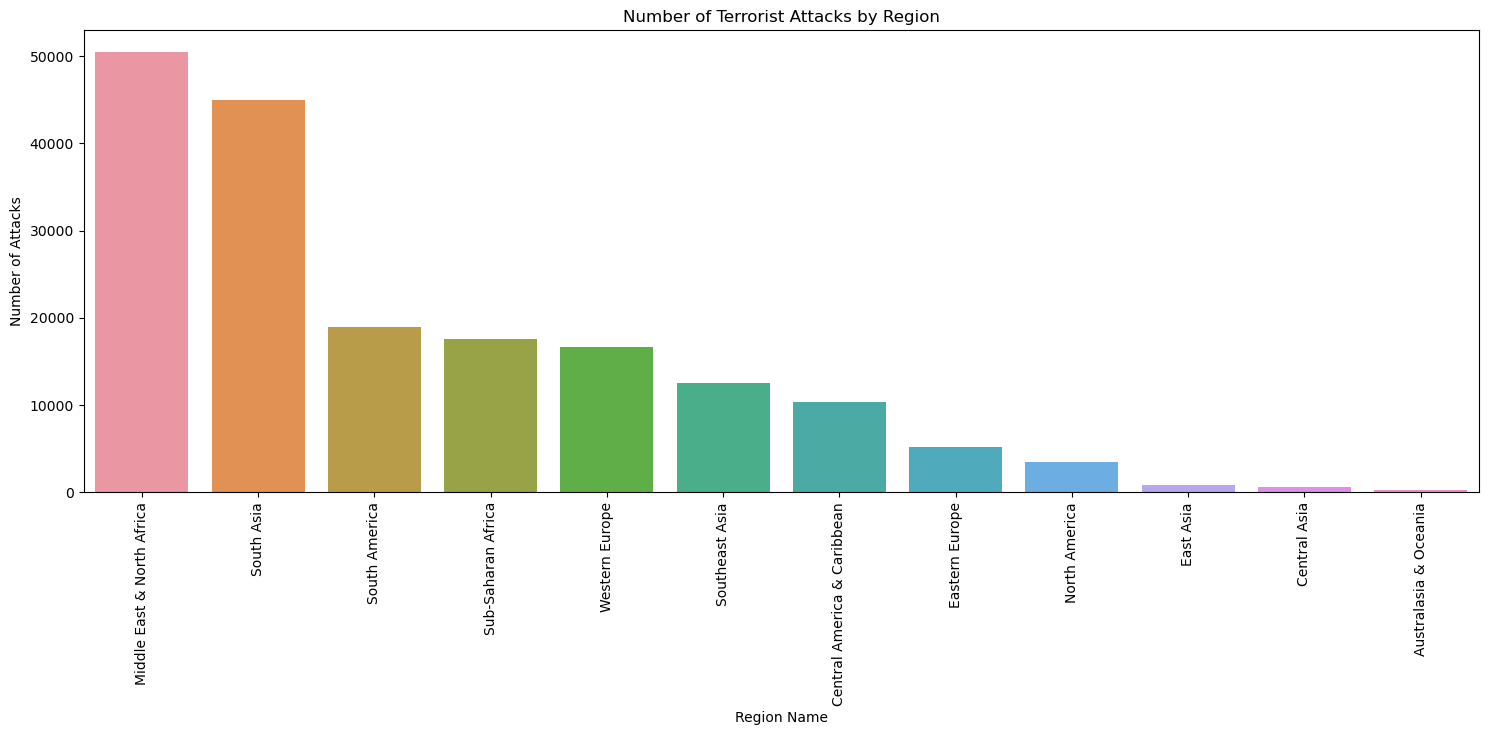

In [17]:
# DATA VISULISATION CODE
# maximum attacks as per regions
regions_and_attack = df1['region_name'].value_counts().rename_axis('Region_Name').reset_index(name='attacks')


plt.figure(figsize=(18, 6))
sns.barplot(x='Region_Name', y='attacks', data=regions_and_attack)
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Region Name')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

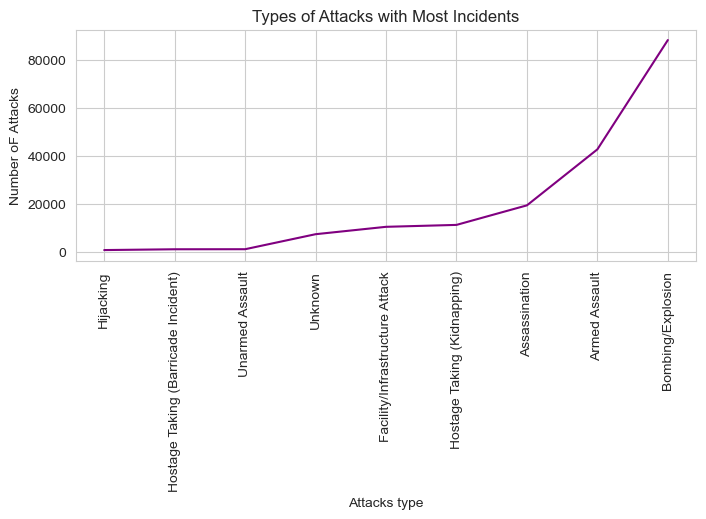

In [18]:
# CHART 2
# ATTACKE TYPES IS MORE 
# Chart - 2 visualization code
max_attacks = df1['attacktype'].value_counts().rename_axis("Type_of_attacks").reset_index(name="attacks")
max_attacks= max_attacks.sort_values(by=['attacks'],ascending = True)

# Set the style for the plot
sns.set_style('whitegrid')

# Create a line plot
plt.figure(figsize=(8, 3))
sns.lineplot(x='Type_of_attacks', y='attacks', data=max_attacks, color='purple')

# Set the labels and title
plt.xlabel('Attacks type')
plt.xticks(rotation = 90)
plt.ylabel('Number oF Attacks')
plt.title('Types of Attacks with Most Incidents')

# Display the plot
plt.show()

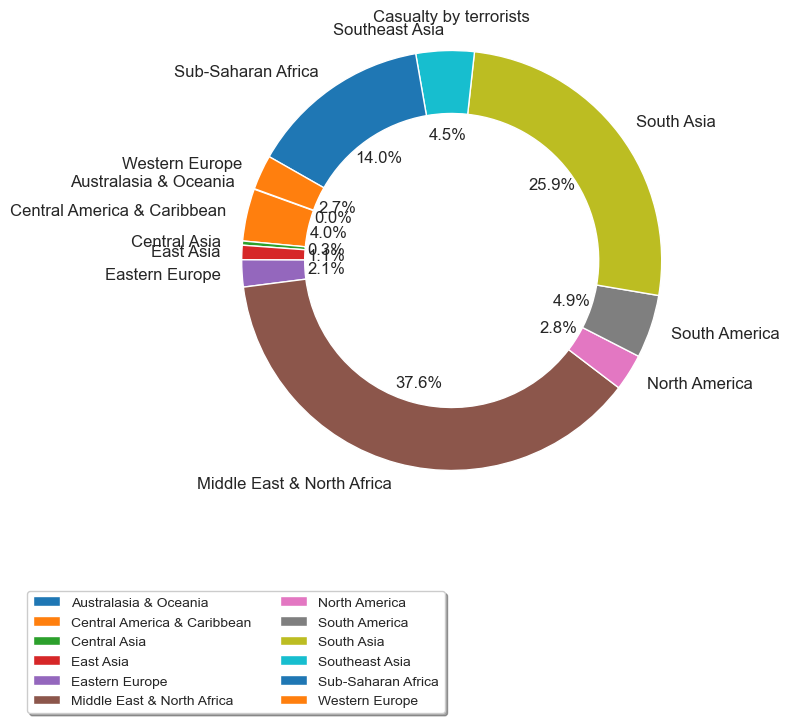

In [19]:
# Chart - 3 visualization code
# maximum Casualty by terrorist at specific region 

max_kills = df1.groupby('region_name')['Casualty'].sum().reset_index(name='total_kills')


# Create a donut pie chart using seaborn and matplotlib
plt.figure(figsize=(8, 6))
plt.title("Casualty by terrorists")

# Set up the inner and outer radius of the donut
inner_radius = 0.5
outer_radius = 1

# Create the pie chart with the desired parameters
wedges, labels, _ = plt.pie(x=max_kills['total_kills'], labels=max_kills['region_name'], autopct='%1.1f%%', startangle=160, wedgeprops=dict(width=0.5, edgecolor='w'), textprops={'fontsize': 12})

# Add a white circle in the middle to create the donut shape
plt.setp(wedges, width=0.3, edgecolor='w')

# Set the aspect ratio to 'equal' and display the chart
plt.axis('equal')
# Create a legend for the chart specifying the elements with lines
plt.legend(wedges, max_kills['region_name'], loc='best', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)

plt.show()

In [20]:
dfm = max_kills.loc[max_kills['total_kills'].idxmax()]
dfmx = pd.DataFrame(dfm)
dfmx

,5
region_name,Middle East & North Africa
total_kills,351950


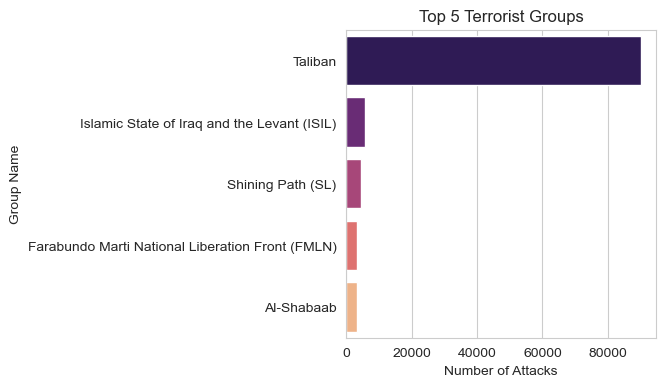

In [21]:
# Chart - 4 visualization code
# Most active terrorits group
df1['Group_Name'] = df1['Group_Name'].replace({'Unknown': 'Taliban'})

hg = df1['Group_Name'].value_counts().rename_axis('group_of_terroist').reset_index(name = 'attacks')
top5 = hg.sort_values(by='attacks', ascending=False).head(5)
sns.set_style("whitegrid")
plt.figure(figsize=(4,4))
sns.barplot(data=top5, y='group_of_terroist', x='attacks', palette='magma')
plt.title('Top 5 Terrorist Groups')
plt.xlabel('Number of Attacks')
plt.ylabel('Group Name')
plt.show()

Text(0.5, 0, 'Countries')

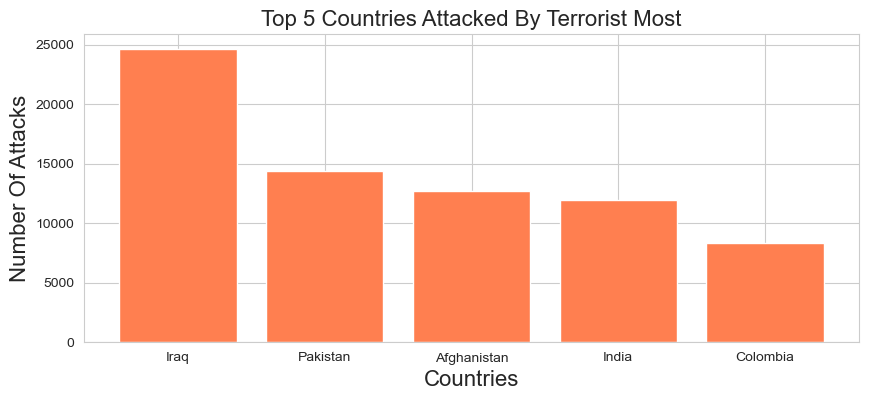

In [22]:
# Chart - 5 visualization code
# hear we see the the more attacks on countery
Max_attacked_countris = df1["Country"].value_counts().rename_axis('Top_attacked_country').reset_index(name = 'attacks')
top5 = Max_attacked_countris.sort_values(by=['attacks'],ascending = False).head(5)
top5
plt.figure(figsize=(10,4))
plt.bar(top5['Top_attacked_country'],top5['attacks'],color = 'coral')
plt.title('Top 5 Countries Attacked By Terrorist Most',fontsize = 16)
plt.ylabel('Number Of Attacks',fontsize = 16)
plt.xlabel('Countries',fontsize = 16)

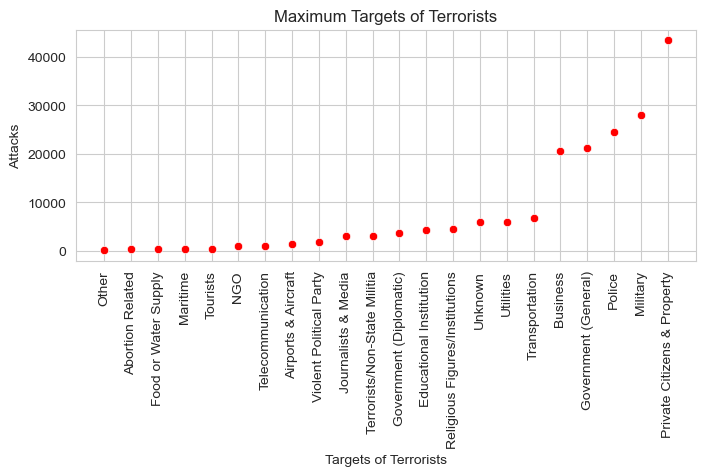

In [23]:
# Chart - 6 visualization code
 # hear we see the maximum target of terrorist is 
 
# Create a scatter plot with the desired parameters
target_of_terrorist = df1['Target_type'].value_counts().rename_axis('Targets are').reset_index(name='attacks')
target_of_terrorist = target_of_terrorist.sort_values(by=['attacks'],ascending = True)

# Create a scatter plot
plt.figure(figsize=(8, 3))
sns.scatterplot(data=target_of_terrorist, x='Targets are', y='attacks', color='red')

plt.title('Maximum Targets of Terrorists')
plt.xlabel('Targets of Terrorists')

plt.ylabel('Attacks')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Trend of Attacks by Year')

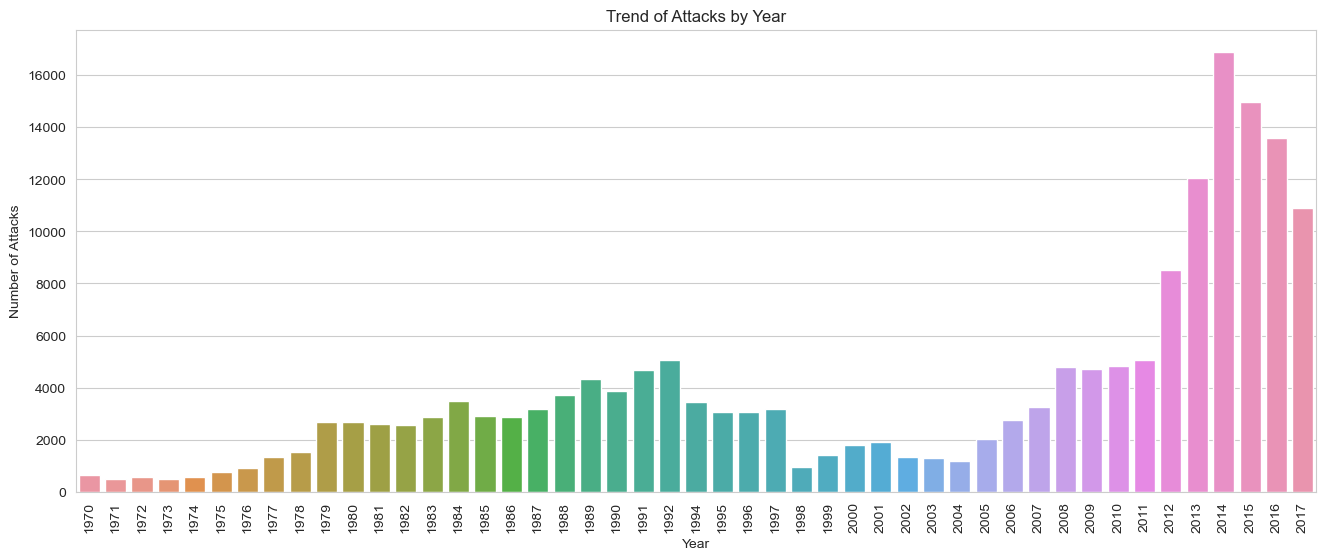

In [24]:
# Chart - 7 visualization code
# attacks count yearly
plt.figure(figsize=(16,6))
sns.countplot(x='Year', data=df1)
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Trend of Attacks by Year')

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_1692\896993833.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


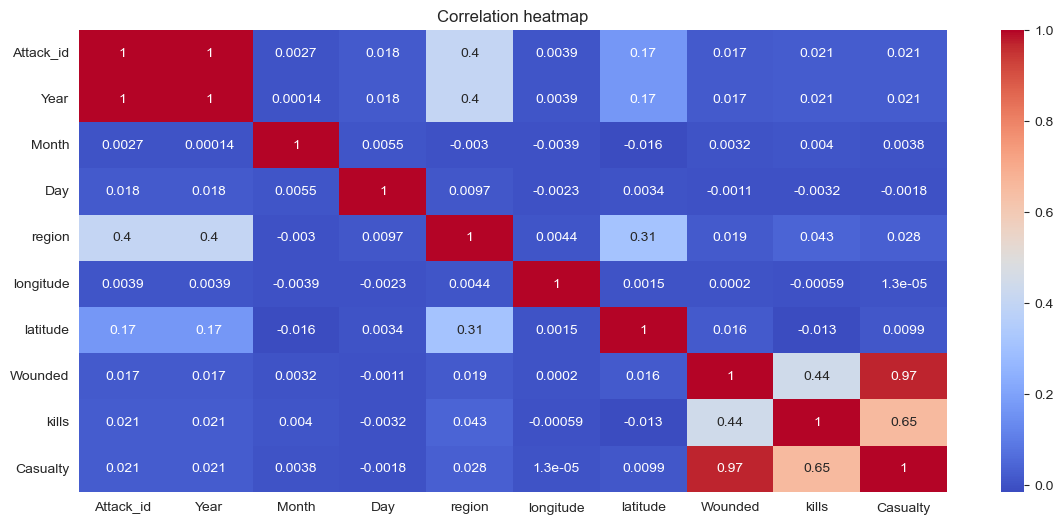

In [25]:
corr = df1.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr,cmap = 'coolwarm',annot = True)

plt.title('Correlation heatmap')
plt.show()

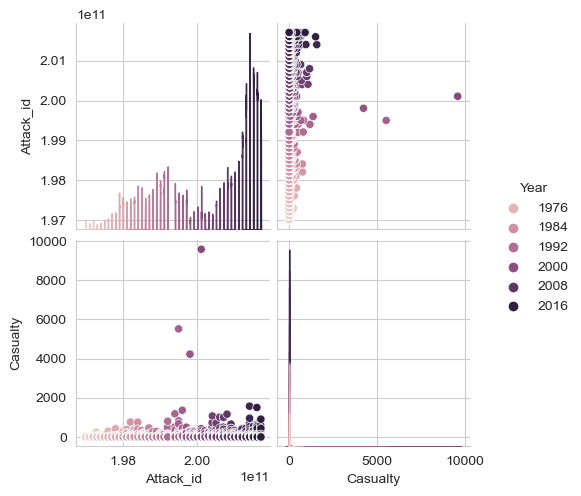

In [26]:
g = sns.pairplot(df1, vars=['Attack_id','Casualty'], hue='Year')
plt.show()